## Project: "Navigating Success in the Google Play Store - A Strategic Analysis for App Developers"
made by: Pawel Wiezel \
LinkedIn: https://www.linkedin.com/in/pawelwiezel/

## 1. Introduction

The Google Play Store stands as one of the largest and most competitive digital marketplaces, hosting millions of Android applications that vie for user attention, engagement, and high ratings. For app developers, navigating this crowded landscape requires more than just innovative ideas—it demands a deep understanding of the factors that drive app visibility, user satisfaction, and long-term success.

In this project, I conduct a comprehensive analysis of Kaggle datasets containing over 10,000 Android apps and 60,000 user reviews. The data is sourced from two main files:

- **apps_data.csv**: This file contains detailed information about each app, such as its category, number of installs, price, size, and other relevant features. These attributes help us understand the landscape of available apps and the characteristics that may influence their performance.
- **review_data.csv**: This file holds user reviews for the apps, including the text of each review and sentiment scores that indicate whether the feedback is positive, negative, or neutral. This allows for an in-depth analysis of user sentiment and satisfaction.

Both datasets can be linked using the `App` column.

My goal is to uncover the underlying patterns and key factors that influence app ratings, user sentiment, and overall app performance. By examining a variety of app features—including price type (free vs. paid), app size, category, and user feedback—I aim to provide insights that can guide developers in making informed decisions.

Specifically, my analysis seeks to answer the following questions:

- **Which categories have the highest market prevalence?**
- **Which categories have the fewest number of apps?**
- **How do app size and price relate to app rating?**
- **How does app pricing differ across categories?**
- **What is the difference in popularity and user sentiment between paid and free apps?**

By exploring these datasets, I move beyond intuition and anecdotal evidence, offering data-driven strategies for app developers who aspire to maximize their impact and success in the Google Play Store. 
The insights derived from this analysis may empower developers to make strategic choices—whether in app design, pricing, or marketing—that resonate with users and foster growth.

[Source](https://www.kaggle.com/lava18/google-play-store-apps) of dataset.

## Data Dictionary

**apps_data.csv**

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| App            | character | The application name                                                         |
| Category       | character | The category the app belongs to                                              |
| Rating         | numeric   | Overall user rating of the app                                               |
| Reviews        | numeric   | Number of user reviews for the app                                           |
| Size           | character | The size of the app                                                          |
| Installs       | character | Number of user installs for the app                                          |
| Type           | character | Either "Paid" or "Free"                                                      |
| Price          | character | Price of the app                                                             |
| Content Rating | character | The age group the app is targeted at - "Children" / "Mature 21+" / "Adult"   |
| Genres         | character | Possibly multiple genres the app belongs to                                  |
| Last Updated   | character | The date the app was last updated                                            |
| Current Ver    | character | The current version of the app                                               |
| Android Ver    | character | The Android version needed for this app                                      |

**review_data.csv**

| variable               | class        | description                                           |
|:-----------------------|:-------------|:------------------------------------------------------|
| App                    | character    | The application name                                  |
| Translated_Review      | character    | User review (translated to English)                   |
| Sentiment              | character    | The sentiment of the user - Positive/Negative/Neutral |
| Sentiment_Polarity     | character    | The sentiment polarity score                          |
| Sentiment_Subjectivity | character    | The sentiment subjectivity score                      |

In [234]:
import pandas as pd
import plotly.express as px
import numpy as np

apps_data = pd.read_csv("apps_data.csv")
review_data = pd.read_csv('review_data.csv')

In [235]:
# Reviewing the dataset
display(apps_data.shape)
apps_data

(10841, 13)

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10841 rows x 13 columns]

In [236]:
# Reviewing the dataset
display(review_data.shape)
review_data.head(10)

(64295, 5)

App  ... Sentiment_Subjectivity
0  10 Best Foods for You  ...               0.533333
1  10 Best Foods for You  ...               0.288462
2  10 Best Foods for You  ...                    NaN
3  10 Best Foods for You  ...               0.875000
4  10 Best Foods for You  ...               0.300000
5  10 Best Foods for You  ...               0.300000
6  10 Best Foods for You  ...               0.900000
7  10 Best Foods for You  ...                    NaN
8  10 Best Foods for You  ...               0.000000
9  10 Best Foods for You  ...               0.000000

[10 rows x 5 columns]

## 2. Data Cleaning

The "Installs" and "Price" columns contain extraneous characters such as "+", ",", and "$", which can interfere with numerical operations. To ensure these columns are suitable for analysis, we will remove any non-numeric characters.

Additionally, the "Size" column occasionally contains the value "Varies with device" instead of a specific measurement. Since this does not provide meaningful information for our analysis, we will remove these rows from the dataset.

Lastly, we will check for and remove any duplicate rows to maintain data integrity and ensure accurate results.

In [237]:
# Removing NULL values from the "Rating" column
apps_data = apps_data[apps_data['Rating'] <=5]

# Checking the rows number after removing NULL values
display(apps_data.shape)

# Reviewing the dataset
apps_data

(9366, 13)

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[9366 rows x 13 columns]

In [238]:
# Removing the duplicate rows
apps_data=apps_data.drop_duplicates()

# Reviewing the row number
display(apps_data.shape)

(8892, 13)

Row count remains the same (8892) - there were no duplicates left

In [239]:
# Replace "Varies with device" in the "Size" column with NaN to handle non-numeric values
apps_data["Size"] = apps_data["Size"].replace("Varies with device", float("NaN"))
display(apps_data.shape)

(8892, 13)

In [240]:
# Removing unwanted characters from the "Installs" and "Price" columns to ensure that these columns contain only numeric values:

# Defining the column names to clean
col_to_mod = ["Installs", "Price"]

# Defining the characters to remove from the dataset
char_to_mod=["+", ",", "$"]

# Iterating over defined columns
for col in col_to_mod:
    # Iterating over defined characters in the column
    for char in char_to_mod:
        # Replacing the character with an empty string
        apps_data[col] = apps_data[col].apply(lambda x: x.replace(char, ""))

# Displaying a summary of the dataframe to check the data types and non-null counts
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            7424 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), object(12)
memory usage: 972.6+ KB


## 3. Correcting Data Types

In the previous step, we observed that the `Installs` and `Price` columns were classified as object data types, rather than numeric types such as integer or float. This is due to the presence of mixed input formats, including digits and special characters, in these columns.

To ensure accurate analysis in the following steps, we need to convert the `Installs`, `Size`, `Rating`, and `Price` columns to appropriate numeric data types.

In [241]:
# Convert Installs to float data type
apps_data["Installs"] = apps_data["Installs"].astype("float")

# Convert Price to float data type
apps_data["Price"] = apps_data["Price"].astype("float")

# Modify Size column
apps_data["Size"] = apps_data["Size"].str.replace("M", "").str.replace("k", "")
apps_data["Size"] = apps_data["Size"].astype("float") * 0.1

# Checking dtypes of the apps dataframe
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            7424 non-null   float64
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(4), object(9)
memory usage: 972.6+ KB


Installs, Size, Rating and Price columns are now of float type.

In [242]:
# Check how does the apps_data look like after modification
apps_data

App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
1                                    Coloring book moana  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
...                                                  ...  ...                 ...
10834                                      FR Calculator  ...          4.1 and up
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[8892 rows x 13 columns]

## 4. Exploring app categories
For companies to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Store. For this purpose Google allows grouping apps into categories.

In this context, it would be useful to examine whether any specific category dominates the market, as well as to identify which categories have the largest and smallest numbers of apps.

In [243]:
# Display number of unique categories
num_categories = apps_data["Category"].nunique()
num_categories

33

- We see, that there are 33 unique app categories present in the dataset. 

In [244]:
# Display number of apps in each category
num_apps_in_category = apps_data["Category"].value_counts()
num_apps_in_category.sort_values(ascending=False)

Category
FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

- Clearly "Family" category has the highest share of apps (1718), followed by "Game" (1074)
- The apps from categories "Beauty", "Events", and "Parenting" have the lowest share: all below 50.

In [245]:
# To be able create a plot with plotly express we need to reset the index.
num_apps_in_category1 = num_apps_in_category.reset_index()
num_apps_in_category1

Category  count
0                FAMILY   1718
1                  GAME   1074
2                 TOOLS    734
3          PRODUCTIVITY    334
4               FINANCE    317
5       PERSONALIZATION    310
6         COMMUNICATION    307
7             LIFESTYLE    305
8           PHOTOGRAPHY    304
9               MEDICAL    302
10               SPORTS    286
11             BUSINESS    270
12   HEALTH_AND_FITNESS    262
13               SOCIAL    244
14   NEWS_AND_MAGAZINES    214
15     TRAVEL_AND_LOCAL    205
16             SHOPPING    202
17  BOOKS_AND_REFERENCE    177
18        VIDEO_PLAYERS    160
19               DATING    159
20            EDUCATION    129
21  MAPS_AND_NAVIGATION    124
22        ENTERTAINMENT    111
23       FOOD_AND_DRINK    106
24              WEATHER     75
25    AUTO_AND_VEHICLES     73
26       HOUSE_AND_HOME     68
27   LIBRARIES_AND_DEMO     65
28       ART_AND_DESIGN     62
29               COMICS     58
30            PARENTING     50
31               EVENTS     45
32               BEAUTY     42

In [246]:
# Creating a bar chart
fig1 = px.bar(
    num_apps_in_category1, 
    x="Category", 
    y="count", 
    text="count",
    labels={"count": "App count", "Category": "Categories"}
)
fig1.update_layout(
    xaxis_title="Categories",
    yaxis_title="App count",
    xaxis_tickangle=45,
)
# Adjust the layout to make room for the text labels
fig1.update_traces(textposition='outside')
fig1.show()

- Family, Game and Tools apps have the highest market prevalence. 
- The apps from Productivity on, have significantly lower app number.
- The lowest app number have apps from Weather on (< 100).

## 5. Distribution of app ratings
After discovering the market share for each category of apps it makes sense to see how all these apps perform, by reviewing the ratings, which are a key performance indicator of an app.

In [247]:
# Calculating the mean ap rating and rounding up the result to 1 decimal point
avg_app_rating=apps_data['Rating'].mean().round(1)
print("Mean app rating:",avg_app_rating)

Mean app rating: 4.2


In [248]:
# Distribution of apps according to their ratings with values over each box
fig3 = px.histogram(apps_data, x="Rating")
fig3.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{y}', textposition='outside')
fig3.update_layout(
    title="Distribution of App Ratings",
    xaxis_title="Rating",
    yaxis_title="App count",
    xaxis_tickangle=45
)
fig3.add_vline(x=avg_app_rating, line_width=2, line_dash="dash", line_color="red")
fig3

The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## 6. Influence of App Size and Price on Ratings

Next, let's explore how an app's size and price might impact its user ratings.

- **App Size:** Large app sizes can deter users due to longer download times and increased data usage, especially for those with limited storage or slower internet connections. Users may abandon the download or uninstall the app if it consumes too much space.
- **App Price:** Many users expect apps to be free or low-cost. Higher prices can reduce the number of downloads and may lead to lower ratings if users feel the app does not provide enough value for the cost.

By analyzing these factors, we can better understand their relationship with app ratings and overall user satisfaction.

In [249]:
# Filter the DataFrame to include only rows where, 'Rating', 'Size' and 'Price' are not null
# This ensures that subsequent analyses involving app size and rating are based on complete data, avoiding misleading results due to missing values in either column
r_s_p_present = apps_data[(apps_data["Rating"].notna()) & (apps_data["Size"].notna()) & (apps_data["Price"].notna())]

# Select categories with at least 250 apps to focus analysis on major categories and minimize noise from less-represented ones
apps_over_250 = num_apps_in_category[num_apps_in_category >= 250]

# Filter the DataFrame to include only apps from the large categories identified above
large_categories = r_s_p_present[r_s_p_present["Category"].isin(apps_over_250.index)]

# Display the newly queried dataframe
large_categories["Category"].value_counts()

Category
FAMILY                1591
GAME                   959
TOOLS                  634
PERSONALIZATION        279
MEDICAL                277
LIFESTYLE              273
FINANCE                263
SPORTS                 232
PRODUCTIVITY           231
BUSINESS               225
PHOTOGRAPHY            225
COMMUNICATION          206
HEALTH_AND_FITNESS     199
Name: count, dtype: int64

In [250]:
# Visualize the relationship between app size and price
fig44=px.histogram(large_categories, x="Size")
fig44.update_traces(marker_line_color='black', marker_line_width=1)
fig44.update_layout(
    title="Distribution of App Sizes vs. Price",
    xaxis_title="Size [Mb]",
    yaxis_title="Price [USD]",
    xaxis_tickangle=45)
fig44

- We can clearly see, that the size of the most apps is below 10 USD.

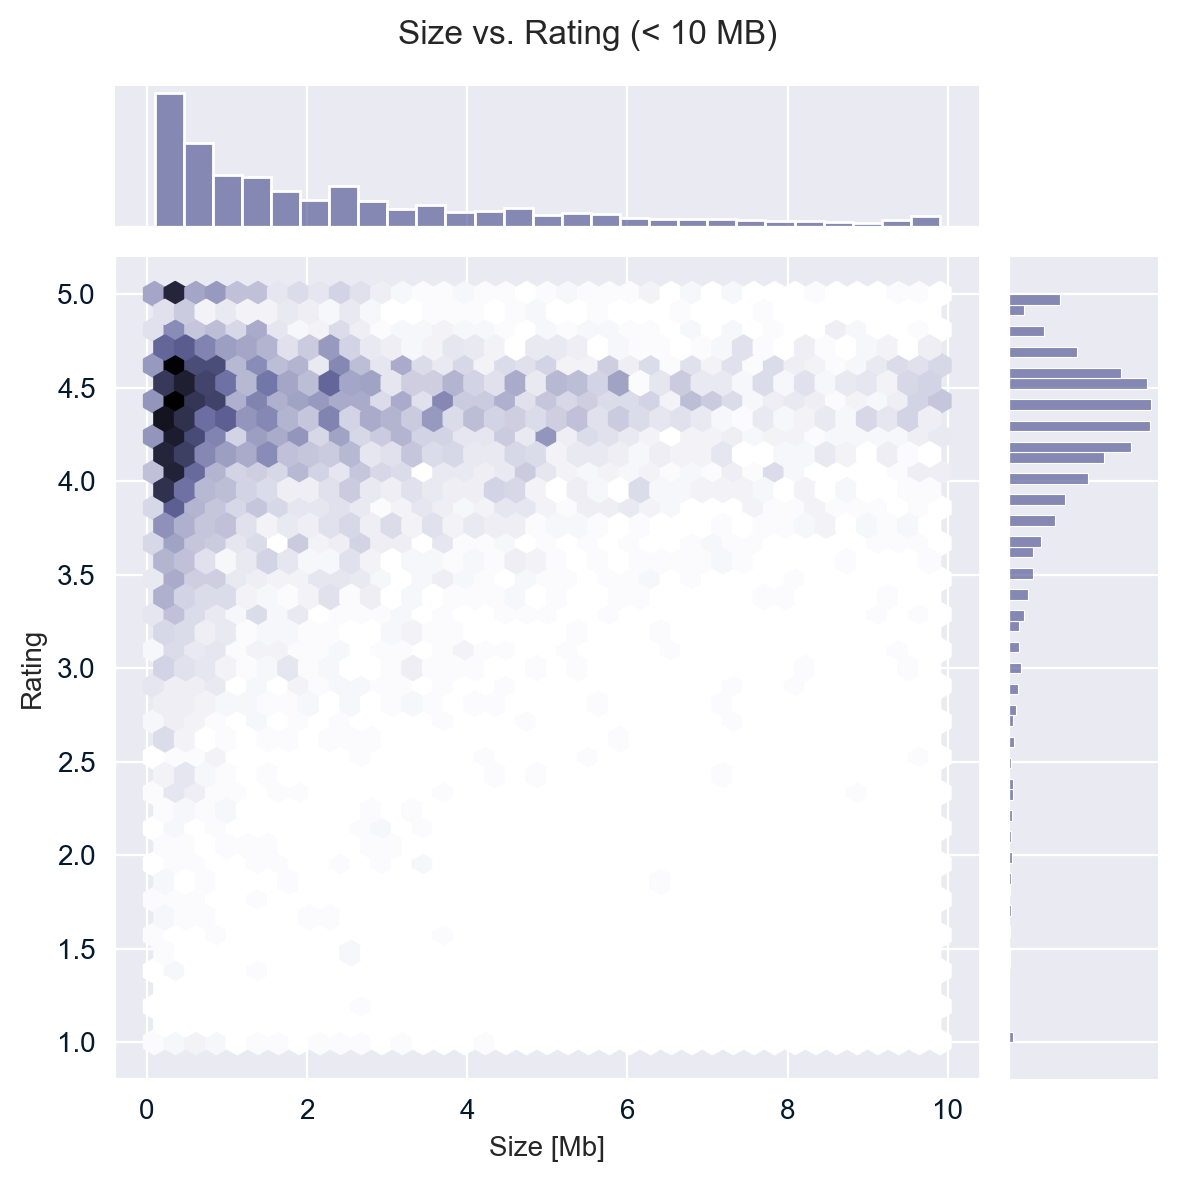

In [251]:
# Creating two hexbin joint plots to visualize the relationship between app size and user rating for major app categories.
# The first plot (plt1) shows the overall distribution, while the second plot (plt2) focuses on apps smaller than 10 MB to better analyze the majority of the data without the influence of extreme outliers.

import seaborn as sns
import numpy as np

# Setting the grid style
sns.set_style("darkgrid")

# Plot size vs. rating
# Reduce the x-axis range to remove extreme results which prevent us from analysing the majority of the results
plt2 = sns.jointplot(x=large_categories[large_categories["Size"] < 10]["Size"], y=large_categories["Rating"], kind="hex")

# Change axis and plot titles

plt2.set_axis_labels("Size [Mb]", "Rating")

plt2.fig.suptitle("Size vs. Rating (< 10 MB)", fontsize=12)
plt2.fig.tight_layout()


Text(0.5, 1.0, 'Rating vs. Size [Mb] (< 10 MB)')

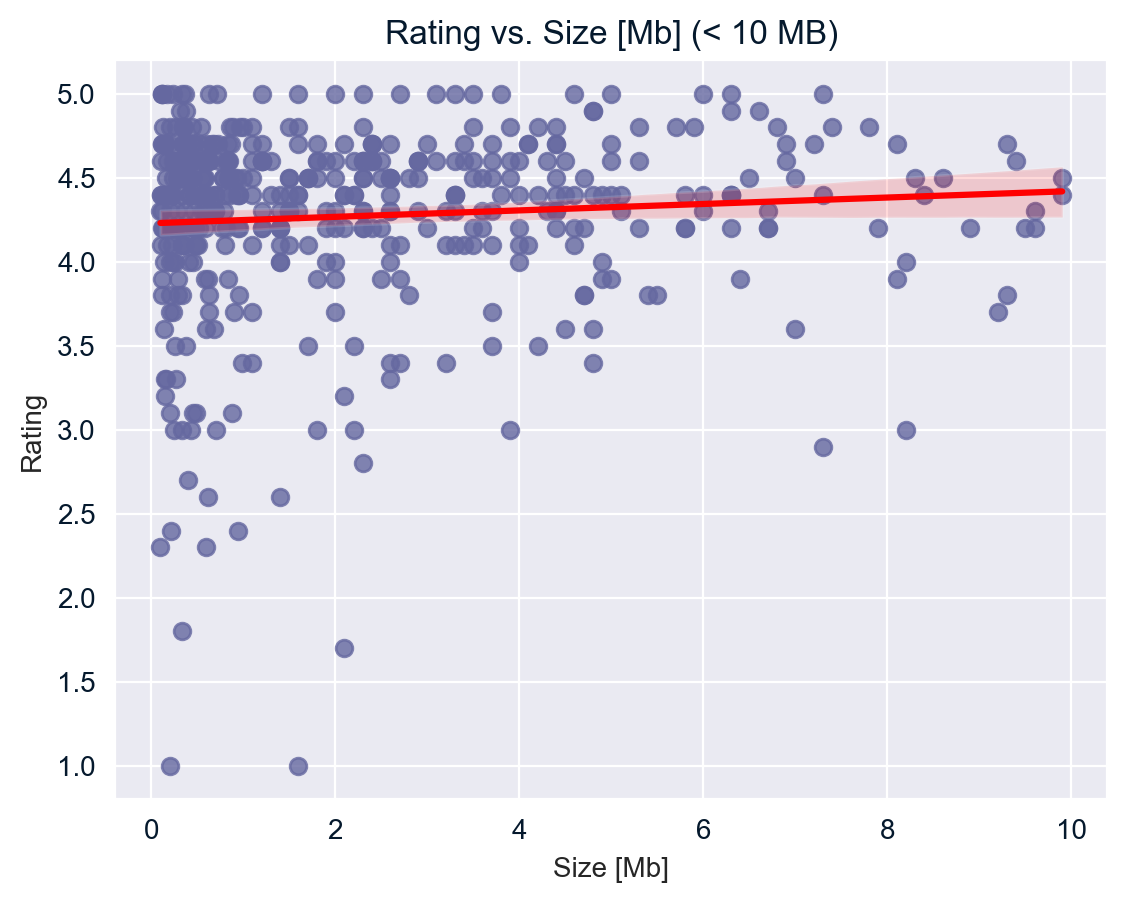

In [252]:
# Add a scatterplot with a trendline to discover the trend in size vs rating for apps smaller than 10 MB.
filtered_paid_apps1 = paid_apps[(paid_apps["Price"] < 10) & (paid_apps["Size"] < 10)]
plt7 = sns.regplot(
    x=filtered_paid_apps1["Size"],
    y=filtered_paid_apps1["Rating"],
    scatter=True,
    line_kws={"color": "red"}
)
plt7.set_xlabel("Size [Mb]")
plt7.set_ylabel("Rating")
plt7.set_title("Rating vs. Size [Mb] (< 10 MB)")

- Most apps with size less than 10 MB have ratings distributed across the full range, with a visible concentration of apps in the lower size range (closer to 2 MB).
- Majority of the apps show rating over 4.
- There is a slight positive correlation between app size (in apps up to 10 Mb) and rating indicating, that bigger apps tent to become better reviews. 

In [253]:
# Select apps whose 'Type' is 'Paid' to analyze price influence.
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

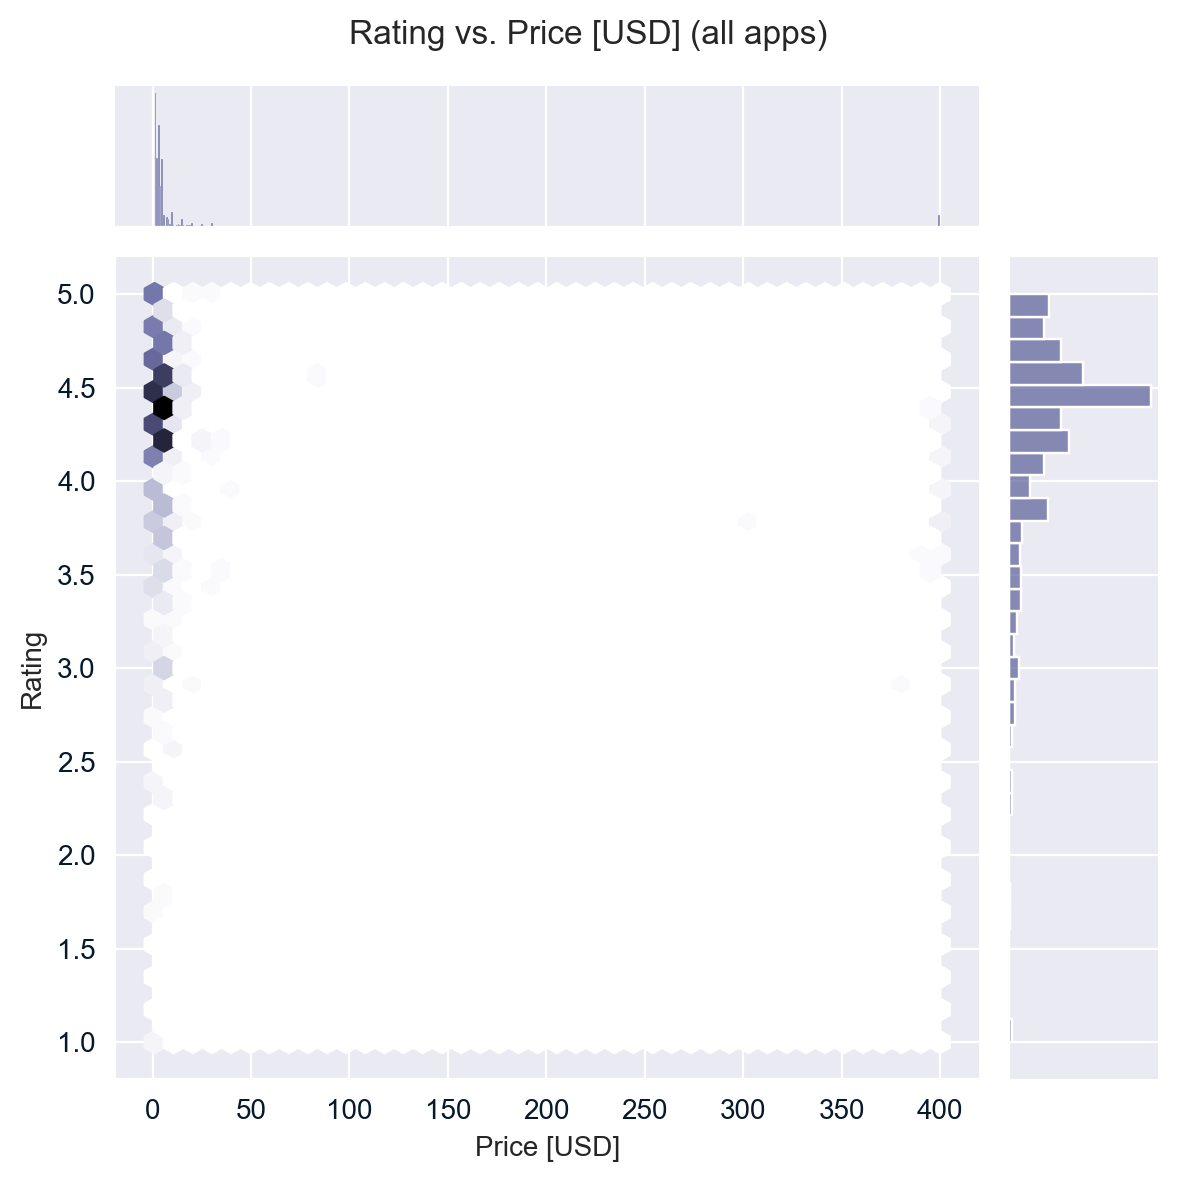

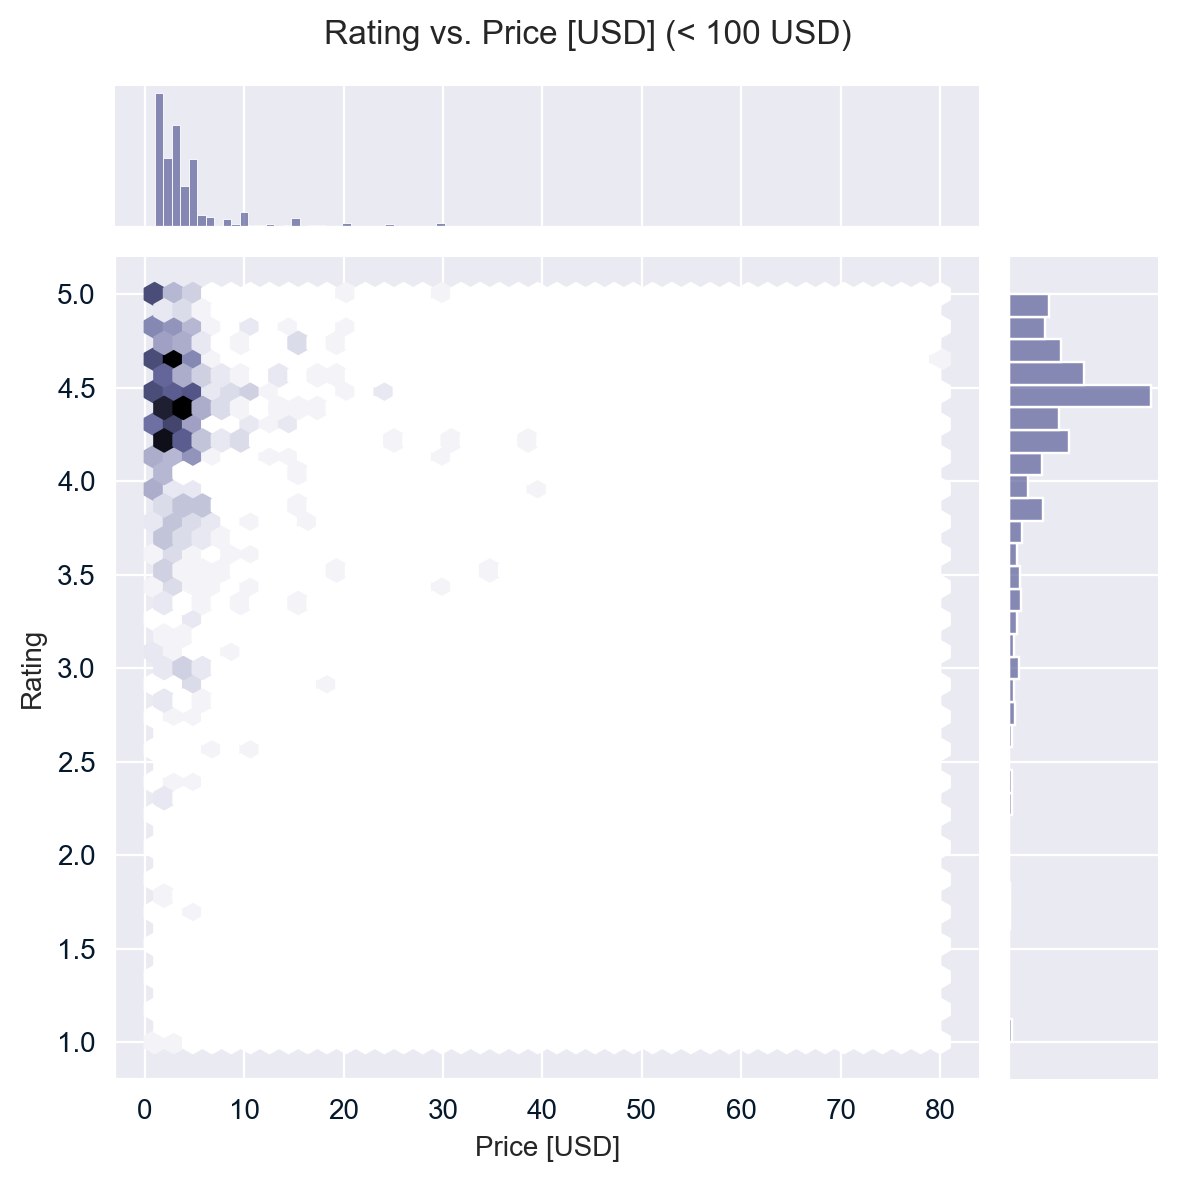

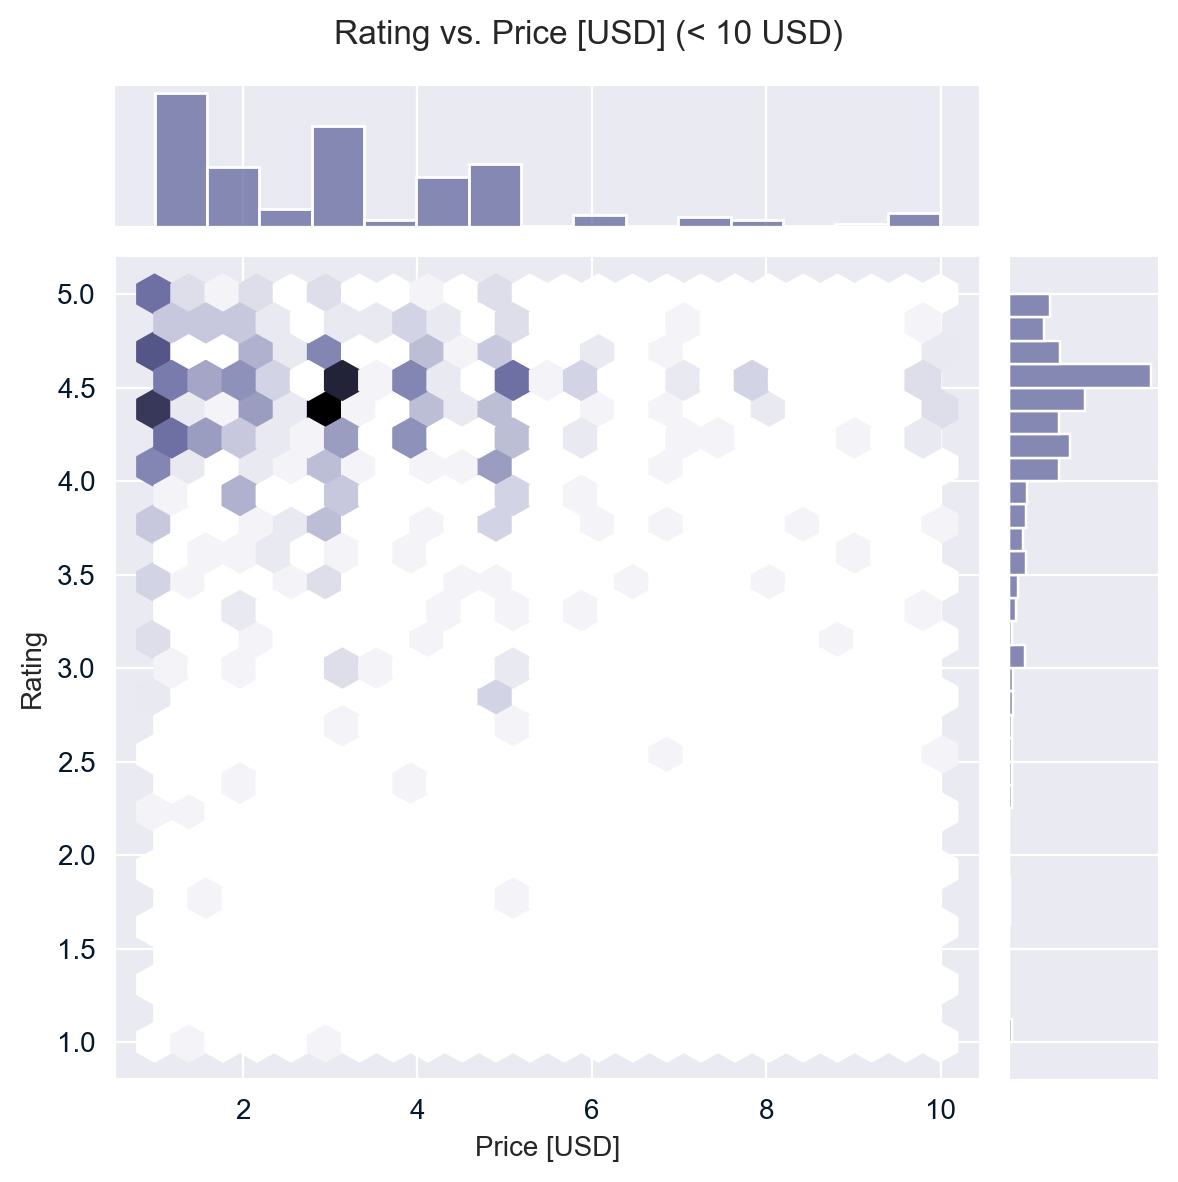

In [254]:
# Plot price vs. rating
plt3 = sns.jointplot(x=paid_apps["Price"], y=paid_apps["Rating"], kind="hex")

# Reduce the x-axis range to remove extreme results which prevent us from analysing the majority of the results
plt4 = sns.jointplot(x=paid_apps[paid_apps["Price"] < 100]["Price"], y=paid_apps[paid_apps["Price"] < 100]["Rating"], kind="hex")

plt5 = sns.jointplot(x=paid_apps[paid_apps["Price"] < 10]["Price"], y=paid_apps[paid_apps["Price"] < 10]["Rating"], kind="hex")

# Change x-axis title to "Price [USD]" for both plots
plt3.set_axis_labels("Price [USD]", "Rating")
plt4.set_axis_labels("Price [USD]", "Rating")
plt5.set_axis_labels("Price [USD]", "Rating")

plt3.fig.suptitle("Rating vs. Price [USD] (all apps)", fontsize=12)
plt4.fig.suptitle("Rating vs. Price [USD] (< 100 USD)", fontsize=12)
plt5.fig.suptitle("Rating vs. Price [USD] (< 10 USD)", fontsize=12)
plt3.fig.tight_layout()
plt4.fig.tight_layout()
plt5.fig.tight_layout()

Text(0.5, 1.0, 'Rating vs. Price [USD] (< 10 USD) with Trendline')

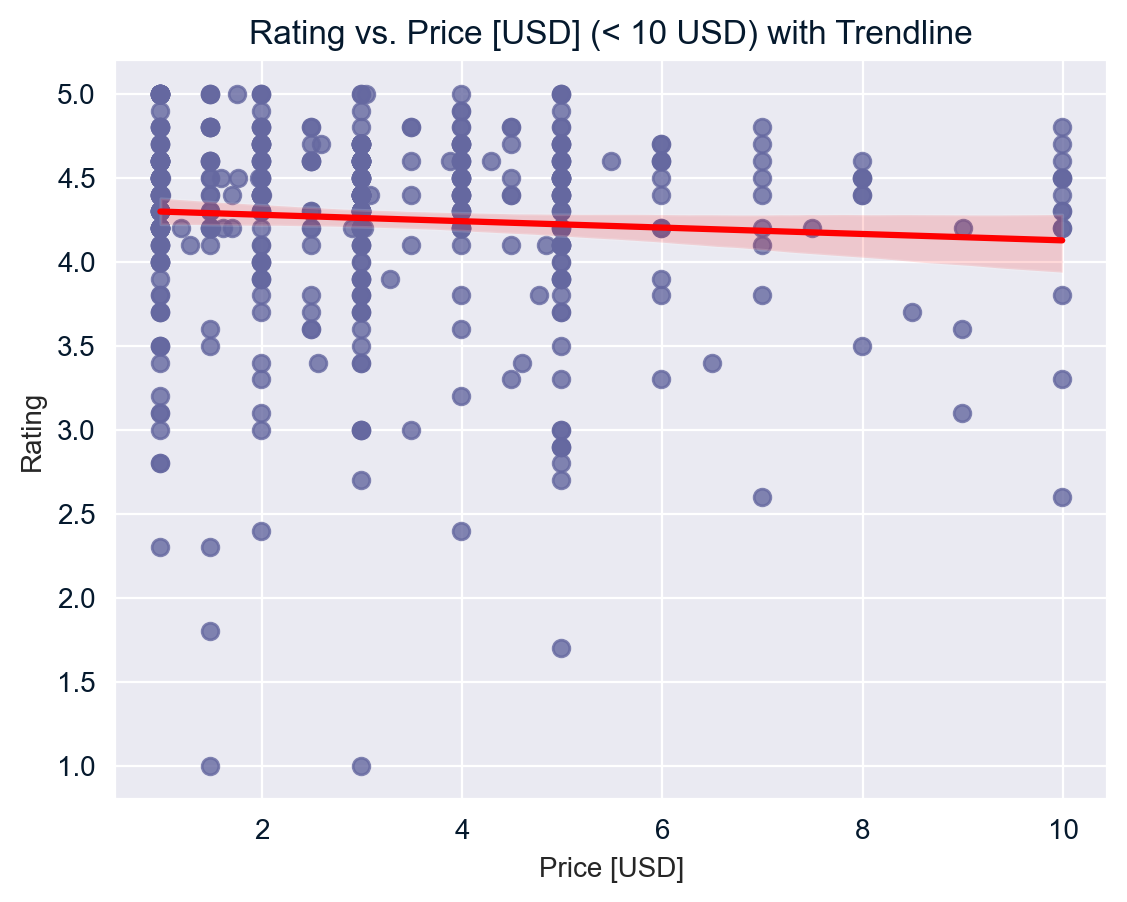

In [255]:
# Add a scatterplot with a trendline to discover the trend in price vs rating.
plt6 = sns.regplot(
    x=paid_apps[paid_apps["Price"] < 10]["Price"],
    y=paid_apps[paid_apps["Price"] < 10]["Rating"],
    scatter=True,
    line_kws={"color": "red"}
)
plt6.set_xlabel("Price [USD]")
plt6.set_ylabel("Rating")
plt6.set_title("Rating vs. Price [USD] (< 10 USD) with Trendline")

- Most of the paid apps cost 5 USD or less.
- No significant trend is visible, but a very slight negative tendency is visible between rating and the increase of the price.

## 7. Relation between app category and app price
It is important to consider the willingness of the customer to pay for the app. Potential customers could be turned off by what they perceive to be a shocking cost, or after receiving too many ads.
Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app. 

In [256]:
# Selecting a few popular app categories
popular_app_cats = apps_data[apps_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

In [257]:
# Examining the price trend by plotting Price vs Category
fig = px.strip(popular_app_cats, x="Price", y="Category", title='App pricing trend across categories', color="Category")
fig.update_layout(xaxis_title="Price [USD]")
fig.show()

- The visualization of app pricing trends across categories further highlights that categories such as MEDICAL and BUSINESS have a wider range and higher maximum prices compared to categories like GAME or FAMILY, which cluster around lower price points.
- This indicates that users are generally willing to pay more for specialized or professional apps, while mass-market categories remain competitively priced.
- Therefore, understanding the target audience and the app's category is crucial for setting an effective pricing strategy.

In [258]:
# Filter apps in popular categories with a price greater than $200 to identify unusually expensive apps, which may indicate niche, premium, or potentially mispriced listings
apps_above_200 = popular_app_cats[popular_app_cats["Price"] > 200]
apps_above_200[['Category', 'App', 'Price', 'Installs', 'Reviews', 'Rating']]

Category                             App  ...  Reviews  Rating
4197     FAMILY          most expensive app (H)  ...        6     4.3
4362  LIFESTYLE                      💎 I'm rich  ...      718     3.8
4367  LIFESTYLE        I'm Rich - Trump Edition  ...      275     3.6
5351  LIFESTYLE                       I am rich  ...     3547     3.8
5354     FAMILY                  I am Rich Plus  ...      856     4.0
5355  LIFESTYLE                   I am rich VIP  ...      411     3.8
5356    FINANCE               I Am Rich Premium  ...     1867     4.1
5357  LIFESTYLE             I am extremely Rich  ...       41     2.9
5358    FINANCE                      I am Rich!  ...       93     3.8
5359    FINANCE              I am rich(premium)  ...      472     3.5
5362     FAMILY                   I Am Rich Pro  ...      201     4.4
5364    FINANCE  I am rich (Most expensive app)  ...      129     4.1
5366     FAMILY                       I Am Rich  ...      217     3.6
5369    FINANCE                       I am Rich  ...      180     4.3
5373    FINANCE              I AM RICH PRO PLUS  ...       36     4.0

[15 rows x 6 columns]

In [259]:
# Quickly checking the average install count for all apps, excluding nulls
apps_data.dropna().describe()


Rating         Size      Installs        Price
count  7418.000000  7418.000000  7.418000e+03  7418.000000
mean      4.171394     3.759210  7.830035e+06     1.117168
std       0.549812     9.499813  4.632233e+07    17.715707
min       1.000000     0.100000  1.000000e+00     0.000000
25%       4.000000     0.590000  1.000000e+04     0.000000
50%       4.300000     1.600000  1.000000e+05     0.000000
75%       4.500000     3.700000  1.000000e+06     0.000000
max       5.000000    99.400000  1.000000e+09   400.000000

- Upon reviewing the table of apps priced above $200, several notable patterns emerge.
- Additionally, the ratings for these apps vary but are frequently low, and many have few or no reviews, further indicating limited user engagement.
- While a small number of these high-priced apps could be legitimate niche or professional tools, the combination of high prices, low and rounded install counts, and minimal user feedback raises questions about their authenticity and popularity.
- Most of mentioned apps contain "I am rich" in the title, what suggests a scam.
- It is possible that some of these listings are mispriced, abandoned, or even dataset artifacts. Therefore, users should be cautious and verify details from official sources before considering the purchase of expensive apps.

## 8. Filter out "junk" apps
Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers do this with malicious intent and try to make money by hoping people accidentally purchase their app in the store.

It is resonable to filter out these junk apps and do another visualization.

In [260]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]
apps_under_100

App  ...         Android Ver
187                     Visual Voicemail by MetroPCS  ...  Varies with device
188                                Indeed Job Search  ...  Varies with device
189                                      Uber Driver  ...  Varies with device
190                             ADP Mobile Solutions  ...          5.0 and up
191                           Snag - Jobs Hiring Now  ...  Varies with device
...                                              ...  ...                 ...
10827                             Fr Agnel Ambarnath  ...        4.0.3 and up
10834                                  FR Calculator  ...          4.1 and up
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[5009 rows x 13 columns]

In [261]:
import plotly.express as px

# Examine price vs category with the authentic apps (apps_under_100)
fig = px.strip(apps_under_100, x="Price", y="Category", title='App pricing trend across categories after filtering for junk apps', color="Category")
fig.show()

After filtering the junk apps the apps within the range of our interest is easier to interpret.

## 9. Popularity of paid apps vs free apps
Theoretically free apps should be more popular that paid. Knowing the difference in the number of installs between free and paid apps can help to buid the pricing strategy for the app.

In [262]:
# Prepare the data
paid_apps = apps_data[apps_data['Type'] == "Paid"]
free_apps = apps_data[apps_data['Type'] == "Free"]

# Create the box plot
fig = px.box(
    apps_data,
    x="Type",
    y="Installs",
    title="Number of Installs of Paid vs. Free Type of App",
    log_y=True, # Set scale of y-axis to logarithmic
    category_orders={"Type": ["Free", "Paid"]}, # Specify order of categories
    color='Type', 
    color_discrete_map={'Paid': 'green', 'Free': 'orange'}
)
# Show the plot
fig.show()

- Based on the box plot comparing the number of installs for paid vs. free apps, we can see a significant difference in popularity between the two types. Free apps have a much higher median number of installs which is 500,000, while paid apps have a median closer 5000.
- The upper quartile for free apps reaches into the millions, whereas for paid apps, even the top 25% reaches 100,000 installs. This concrete difference highlights that free apps are generally much more popular and widely downloaded than paid apps, supporting the expectation that removing the price barrier leads to greater adoption.

## 10. Sentiment analysis of user reviews
To determine how people feel about the product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app by making statistics of used positive vs negative words in reviews.


In [263]:
# Joining the two dataframes to access more detailed reviews data
merged_df = pd.merge(apps_data, review_data, on = "App")

# Dropping NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

# User review sentiment polarity for paid vs. free apps
fig = px.box(merged_df, x='Type', y='Sentiment_Polarity', title='Sentiment Polarity Distribution According to the Type of the App', color='Type', color_discrete_map={'Free': 'orange', 'Paid': 'green'})

fig.show()

- Free apps receive a lot of negative comments, as indicated by the outliers on the negative y-axis. 
- Reviews for paid apps appear never to be extremely negative (q1 paid = 0.02 vs. q1 free = -0.009), which may indicate something about app quality: paid apps are on average of higher quality than free apps. 
- The median polarity score for paid apps is a little higher than free apps, thereby syncing with the previous observation (0.23 vs 0.125).

## 11. Summary

This section provides a concise overview of the key findings from the analysis of the app dataset. By examining various aspects such as category prevalence, app size, pricing, ratings, and user sentiment, we gain valuable insights into the dynamics of the app market. The following points summarize the main trends and observations identified throughout the study:

**Which categories have the highest market prevalence?**  
- The categories with the highest number of apps are Family, Game, and Tools. These categories dominate the app market, indicating strong user demand and developer interest.

**Which categories have the fewest number of apps?**  
- The categories with the fewest apps are Weather and those listed after it, each with fewer than 100 apps. This suggests niche markets or lower user engagement in these areas.

**How do app size and price relate to app rating?**  
- Higher app size and higher price are associated with higher average ratings. Most top-rated apps are between 2 MB and 20 MB in size, suggesting that users prefer apps that are feature-rich but not excessively large. Expensive apps tend to be rated more favorably, possibly reflecting higher quality or specialized functionality.

**How does app pricing differ across categories?**  
- Medical and Family apps tend to be the most expensive, with some priced up to 80 USD.
- Game apps are all priced below 20 USD, and most apps overall are under 10 USD. This variation in pricing reflects differences in app complexity, target audience, and perceived value across categories.

**What is the difference in popularity and user sentiment between paid and free apps?**  
- Paid apps have fewer installations than free apps, likely due to the upfront cost barrier. Free apps receive more negative reviews, while paid apps rarely receive extremely negative reviews. The median sentiment polarity is higher for paid apps than for free apps, suggesting that users who pay for apps may have higher satisfaction or that their expectations are better met.

**Additional Insights:**  
- The distribution of user sentiment shows that free apps are more prone to outlier negative reviews, possibly due to a larger and more diverse user base.  
- Paid apps, while less popular in terms of downloads, tend to foster a more positive user experience, as reflected in both sentiment analysis and rating distributions.  
- Most apps, regardless of category, are priced affordably, making the app market accessible to a wide range of users.